## Results

In [38]:

from data import *
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import swifter
from tqdm import tqdm
import regex as re

In [39]:
args = didi.parse()
par = Params()
data = Data(par)

# load_dir = '/data/gpfs/projects/punim2119/EightK/res/temp/vec_pred/5e8b285d69edeee2833f1f2aa4d81ef00f787ed5188fcf557a54d04ad73af547/OPT_125m/NEWS_SINGLE/' # No Normalisation, Ret
# load_dir = '/data/gpfs/projects/punim2119/EightK/res/temp/vec_pred/23c308fffeb08a56e3eb4b0717303816005bafc70a823f1a45b92c2c9027ab88/OPT_125m/NEWS_SINGLE/' # No Normalisation, Abret
# load_dir = '/data/gpfs/projects/punim2119/EightK/res/temp/vec_pred/d7cc8fc49ceec47bf5ac309008d70a2ed2e1e7df992a46af4c24ecdaf9a71c85/OPT_125m/NEWS_SINGLE/' # Normalisation, Ret
# load_dir = '/data/gpfs/projects/punim2119/EightK/res/temp/vec_pred/94b11dd4cdedaa2336935ea8d1c0320df74fdba113fa2ffbae5c448a91abf9ac/OPT_125m/NEWS_SINGLE/' # large model 2019
#load_dir = '/data/gpfs/projects/punim2119/EightK/res/temp/vec_pred/8f0a05c1bb38a954d7defbe0ae7e0fb3725f1c97236de7c82f8f002924b05c2e/OPT_125m/NEWS_SINGLE/' # large model 2017
load_dir = "/data/gpfs/projects/punim2119/EightK/res/temp/vec_pred/last_large_full/OPT_125m/NEWS_SINGLE/"

model_outputs = [os.path.join(load_dir, f) for f in os.listdir(load_dir) if re.match(r'\d+.p$', f)]
model_outputs

['/data/gpfs/projects/punim2119/EightK/res/temp/vec_pred/last_large_full/OPT_125m/NEWS_SINGLE/2012.p',
 '/data/gpfs/projects/punim2119/EightK/res/temp/vec_pred/last_large_full/OPT_125m/NEWS_SINGLE/2013.p',
 '/data/gpfs/projects/punim2119/EightK/res/temp/vec_pred/last_large_full/OPT_125m/NEWS_SINGLE/2014.p',
 '/data/gpfs/projects/punim2119/EightK/res/temp/vec_pred/last_large_full/OPT_125m/NEWS_SINGLE/2015.p',
 '/data/gpfs/projects/punim2119/EightK/res/temp/vec_pred/last_large_full/OPT_125m/NEWS_SINGLE/2016.p',
 '/data/gpfs/projects/punim2119/EightK/res/temp/vec_pred/last_large_full/OPT_125m/NEWS_SINGLE/2017.p',
 '/data/gpfs/projects/punim2119/EightK/res/temp/vec_pred/last_large_full/OPT_125m/NEWS_SINGLE/2018.p']

In [40]:
crsp = data.load_crsp_daily()
crsp_sorted = crsp.sort_values(by=['permno', 'date'])
crsp_sorted.head(10)

,permno,date,ticker,prc,ret,bid,ask,shrout
0,10001,1993-01-04,GFGC,14.50,0.035714,14.00,14.50,1080.0
1,10001,1993-01-05,GFGC,-14.25,-0.017241,14.00,14.50,1080.0
2,10001,1993-01-06,GFGC,-14.25,0.000000,14.00,14.50,1080.0
3,10001,1993-01-07,GFGC,14.50,0.017544,14.00,14.50,1080.0
4,10001,1993-01-08,GFGC,14.50,0.000000,14.00,14.50,1080.0
5,10001,1993-01-11,GFGC,14.50,0.000000,14.00,14.50,1080.0
6,10001,1993-01-12,GFGC,-14.25,-0.017241,14.00,14.50,1080.0
7,10001,1993-01-13,GFGC,13.75,-0.035088,13.75,14.25,1080.0
8,10001,1993-01-14,GFGC,13.75,0.000000,13.75,14.25,1080.0
9,10001,1993-01-15,GFGC,-14.00,0.018182,13.75,14.25,1080.0


In [41]:
# read df from pickle
#date should be in datetime64[ns]
df = pd.read_pickle(model_outputs[0]).rename(columns={'ticker':'permno'})
df['date'] = pd.to_datetime(df['date'])
df.rename(columns={'date': 'date_news'}, inplace=True)
df

,id,date_news,permno,y_true,y_pred,y_pred_prb,accuracy
0,20120103-001514000-nL1E8C3003-1-1,2012-01-03,23819,0,1,0.507723,False
1,20120103-003939000-nL1E8C3003-1-2,2012-01-03,23819,0,1,0.513564,False
2,20120103-043854000-nL1E8C306Z-1-2,2012-01-03,23819,0,0,0.476440,True
3,20120103-085633000-nRTV359836-1-2,2012-01-03,23819,0,1,0.513852,False
4,20120103-091333000-nRTV359836-1-2,2012-01-03,23819,0,1,0.513852,False
...,...,...,...,...,...,...,...
430448,20120515-120124000-nPnSF07092-1-2,2012-05-15,28804,0,1,0.516762,False
430449,20120515-120125000-nPnSF07150-1-2,2012-05-15,85576,1,1,0.501940,True
430450,20120515-120409000-nPnCL07067-1-2,2012-05-15,78876,1,0,0.490621,False
430451,20120515-120501000-nBw155385a-1-2,2012-05-15,92121,0,1,0.517236,False


In [42]:
df['accuracy'].mean()

0.5183469507704674

In [43]:
# Combine all years

dfs = []
for mo in model_outputs:
    df = pd.read_pickle(mo).rename(columns={'ticker':'permno'})
    df['date'] = pd.to_datetime(df['date'])
    df.rename(columns={'date': 'date_news'}, inplace=True)
    dfs.append(df)

df = pd.concat(dfs)



In [44]:
n_days_ahead = 1

print('Creating permno mapping')
crsp_grouped = crsp_sorted.groupby('permno')
permno_mapping = {}
permno_date_to_index_mapping = {}  # New mapping for date to index

for permno, group in tqdm(crsp_grouped):
    records = group[['date', 'prc', 'ret', 'bid', 'ask', 'shrout']].to_records(index=False)
    permno_mapping[permno] = records
    permno_date_to_index_mapping[permno] = {date: idx for idx, date in enumerate(group['date'])}


Creating permno mapping


100%|██████████| 14658/14658 [00:52<00:00, 278.83it/s]


In [45]:
# Function to perform binary search and get nth day return
def get_nth_day_return(row):
    permno = row['permno']
    date_news = row['date_news']

    trading_days = permno_mapping.get(permno, None)
    date_to_index = permno_date_to_index_mapping.get(permno, {})

    if trading_days is not None and date_news in date_to_index:
        start_index = date_to_index[date_news]
        nth_index = start_index + n_days_ahead

        if nth_index < len(trading_days):
            nth_day_data = trading_days[nth_index]
            return pd.Series({
                'date': nth_day_data.date,
                'prc': nth_day_data.prc,
                'ret': nth_day_data.ret,
                'bid': nth_day_data.bid,
                'ask': nth_day_data.ask,
                'shrout': nth_day_data.shrout
            })
    # Return default values if conditions are not met
    return pd.Series({
        'date': pd.NaT,
        'prc': None,
        'ret': None,
        'bid': None,
        'ask': None,
        'shrout': None
    })

tqdm.pandas(desc="Processing rows")
additional_columns = df.progress_apply(get_nth_day_return, axis=1)
for col in ['prc', 'ret', 'bid', 'ask', 'shrout']:
    additional_columns[col] = pd.to_numeric(additional_columns[col], errors='coerce')
df_merged = pd.concat([df, additional_columns], axis=1)
df_merged.rename(columns={'date': 'date_trade'}, inplace=True)
df_merged

Processing rows: 100%|██████████| 3368524/3368524 [08:45<00:00, 6413.72it/s] 


,id,date_news,permno,y_true,y_pred,y_pred_prb,accuracy,date_trade,prc,ret,bid,ask,shrout
0,20120103-001514000-nL1E8C3003-1-1,2012-01-03,23819,0,1,0.507723,False,2012-01-04,35.12,0.028404,35.11000,35.12000,920165.0
1,20120103-003939000-nL1E8C3003-1-2,2012-01-03,23819,0,1,0.513564,False,2012-01-04,35.12,0.028404,35.11000,35.12000,920165.0
2,20120103-043854000-nL1E8C306Z-1-2,2012-01-03,23819,0,0,0.476440,True,2012-01-04,35.12,0.028404,35.11000,35.12000,920165.0
3,20120103-085633000-nRTV359836-1-2,2012-01-03,23819,0,1,0.513852,False,2012-01-04,35.12,0.028404,35.11000,35.12000,920165.0
4,20120103-091333000-nRTV359836-1-2,2012-01-03,23819,0,1,0.513852,False,2012-01-04,35.12,0.028404,35.11000,35.12000,920165.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
579549,GNX25Z3vm_1809282/C2MYyYoGWfz6B13081np1Ko5zpr8...,2018-09-28,14707,1,1,0.529857,True,2018-10-01,18.80,0.056180,18.81000,18.82000,45540.0
579550,GNX1Q3B3d_1809282DIJ2huMTjdb3r3SYnnjYOmmqeNLgQ...,2018-09-28,13527,1,1,0.525658,True,2018-10-01,128.13,-0.014839,128.13000,128.14000,55727.0
579551,GNX1csn08_1809282EaSxDzB8DftmQSScKaQma2xQ3Phby...,2018-09-28,12623,1,1,0.526154,True,2018-10-01,257.38,0.005077,257.29999,257.31000,43318.0
579552,GNX1Kv7vX_1809282Jz2Gupn9embV6CtoKXb0Q32JKHGC7...,2018-09-28,87267,0,1,0.527194,False,2018-10-01,473.47,0.004540,473.47000,473.51001,159584.0


In [46]:
df_grouped =df_merged.groupby(['permno','date_news'])[['ret','y_pred_prb','y_true', 'prc']].mean().reset_index()

df_grouped['year'] = df_grouped['date_news'].dt.year
print(df_grouped.groupby('year')['y_pred_prb'].mean())
df_grouped['tresh'] = df_grouped.groupby('year')['y_pred_prb'].transform('mean')

year
2012    0.511762
2013    0.514265
2014    0.536346
2015    0.546077
2016    0.543916
2017    0.555286
2018    0.568237
Name: y_pred_prb, dtype: float32


In [47]:
df_grouped['pred'] = df_grouped['y_pred_prb']>df_grouped['tresh']
# df_grouped['pred'] = df_grouped['y_pred_prb']>0.5
df_grouped['accuracy']=df_grouped['pred']==df_grouped['y_true']
df_grouped['accuracy'].mean()

0.49918296347056035

In [48]:
df_merged['accuracy'].mean()

0.5129475105417091

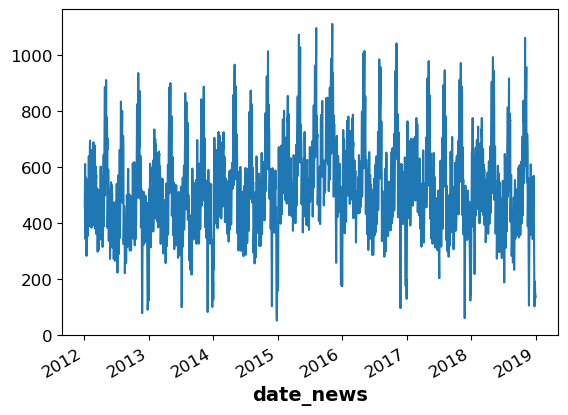

In [49]:

df_grouped.groupby('date_news')['permno'].count().plot()
df_grouped['pct']=df_grouped.groupby('date_news')['y_pred_prb'].rank(pct=True)

In [50]:
df_grouped

,permno,date_news,ret,y_pred_prb,y_true,prc,year,tresh,pred,accuracy,pct
0,10002,2012-01-31,0.000000,0.516891,0.0,1.28000,2012,0.511762,True,False,0.731466
1,10002,2012-03-21,-0.181879,0.525701,1.0,1.21900,2012,0.511762,True,True,0.976690
2,10002,2012-03-29,0.207629,0.499081,0.0,1.45000,2012,0.511762,False,True,0.052192
3,10002,2012-04-30,0.105769,0.519943,0.0,2.30000,2012,0.511762,True,False,0.877612
4,10002,2012-06-15,0.003390,0.515703,1.0,2.96000,2012,0.511762,True,True,0.594096
...,...,...,...,...,...,...,...,...,...,...,...
967516,93436,2018-12-24,0.103930,0.580580,0.0,326.09000,2018,0.568237,True,False,0.554455
967517,93436,2018-12-26,-0.030544,0.594175,1.0,316.13000,2018,0.568237,True,True,0.576389
967518,93436,2018-12-27,0.056116,0.589118,0.0,333.87000,2018,0.568237,True,False,0.605263
967519,93436,2018-12-28,-0.003205,0.599375,1.0,332.79999,2018,0.568237,True,True,0.620000


In [51]:
confusion_matrix(df_grouped['y_true'], df_grouped['pred'])

array([[215616, 238361],
       [246190, 267354]], dtype=int64)

<Axes: xlabel='date_news'>

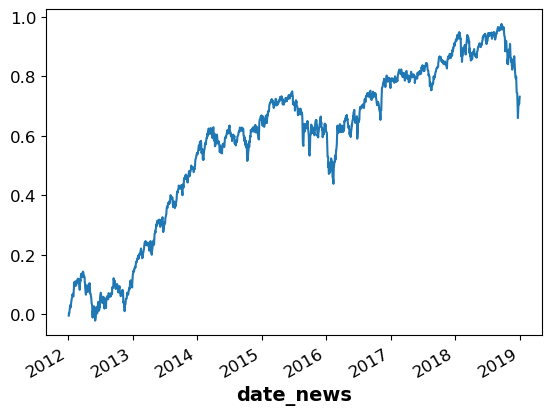

In [52]:
df_grouped.groupby(['date_news'])['ret'].mean().cumsum().plot()

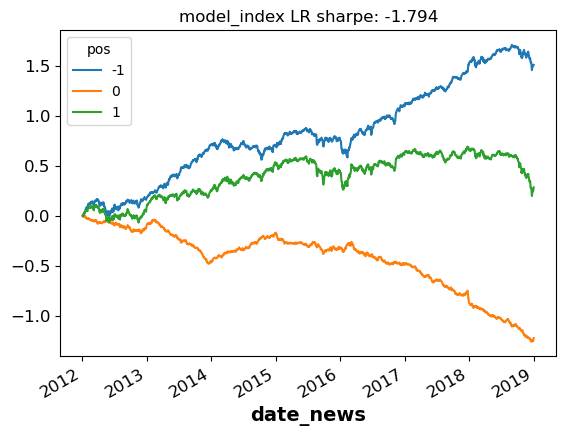

In [53]:
tresh = 0.2
df_grouped['pos'] = 1*(df_grouped['pct']>(1-tresh)) - (df_grouped['pct']<=tresh)*1
ret=df_grouped.groupby(['date_news','pos'])['ret'].mean().reset_index().pivot(columns='pos',index='date_news',values='ret')
ret[0] = ret[1]-ret[-1]
ret.cumsum().plot()
sh = np.sqrt(252)*(ret.mean()/ret.std()).round(3)
plt.title(f'model_index {"LR"} sharpe: {np.round(sh[0],3)}')
plt.show()

In [54]:
# index ret by [1, -1, 0]
ret_formated = ret[[1, -1, 0]]
sh_formated = np.sqrt(252)*(ret_formated.mean()/ret_formated.std()).round(3)
print("        ", "Long", "Short", "L-S", sep="\t")
print("Return: ", *list((252 * ret_formated.mean()).round(3)), sep="\t")
print("Std:    ", *list((np.sqrt(252)*ret_formated.std()).round(3)), sep="\t")
print("Sharpe: ", *list(sh_formated.round(3)), sep="\t")

        	Long	Short	L-S
Return: 	0.041	0.216	-0.175
Std:    	0.172	0.158	0.098
Sharpe: 	0.238	1.365	-1.794
